L17

(35.0, 50.0)

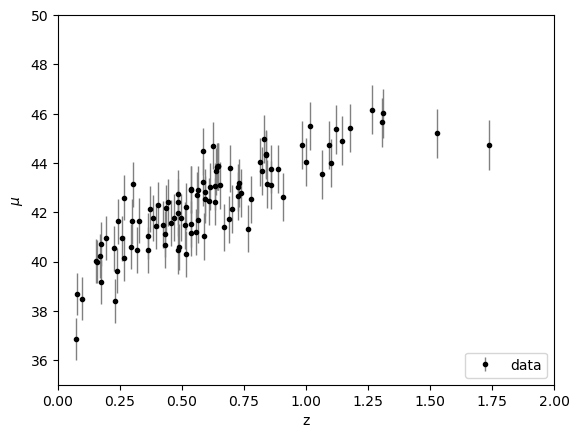

In [1]:
from astroML.datasets import generate_mu_z
import matplotlib.pyplot as plt
import numpy as np

z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234) # YOU CANNOT CHANGE THIS

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

Now, only train-test split, no k-cross validation (there no 'for' cicle on the k. The k selection is aribritary, there is not a procedure to choose that, it's a computaional time choice, if k is high the code will run for long time)

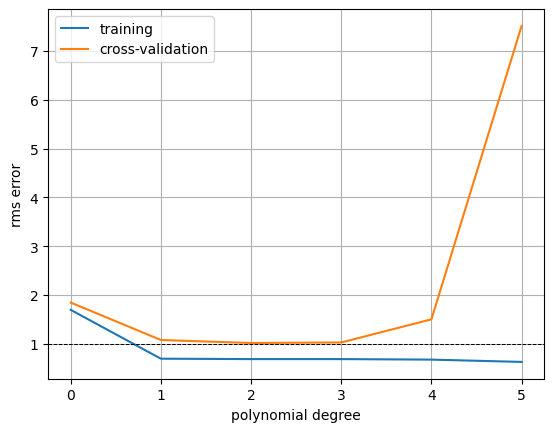

In [62]:
from astroML.linear_model import PolynomialRegression
from sklearn.model_selection import train_test_split

poly_deg = np.arange(0, 6)

Xtrain, Xtest, Ytrain, Ytest, Ytrain_err, Ttest_err  = train_test_split(z_sample, mu_sample, dmu, test_size=0.80, random_state=22)

training_err = np.zeros(poly_deg.shape)
crossval_err = np.zeros(poly_deg.shape)

models = []

#for sul poly_deg
for i in range(len(poly_deg)):
    
    model = PolynomialRegression(i) 
    model.fit(Xtrain[:, np.newaxis], Ytrain, Ytrain_err)


    models.append(model)

    training_err[i] = np.sqrt(np.sum((model.predict(Xtrain[:, np.newaxis]) - Ytrain) ** 2)
                              / len(Ytrain))
    crossval_err[i] = np.sqrt(np.sum((model.predict(Xtest[:, np.newaxis]) - Ytest) ** 2)
                              / len(Ytest))


plt.plot(poly_deg, training_err, label='training')
plt.plot(poly_deg, crossval_err, label='cross-validation')
plt.axhline(1, linestyle='--', color='black', linewidth=0.7)
plt.grid()
plt.ylabel('rms error')
plt.xlabel('polynomial degree')
plt.legend()


(35.0, 50.0)

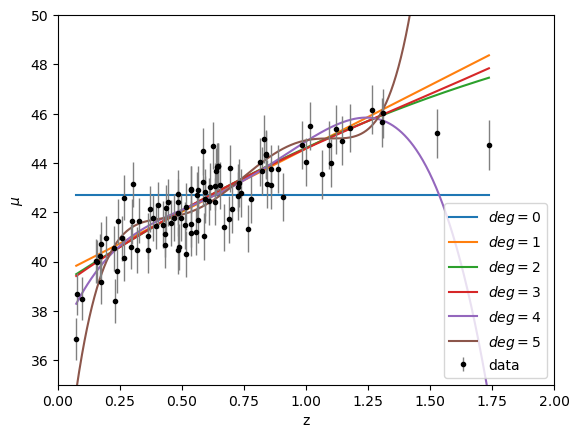

In [61]:
x = np.linspace(min(z_sample), max(z_sample), 1000)

plt.plot(x, models[0].predict(x[:, np.newaxis]), label='$deg = 0$')
plt.plot(x, models[1].predict(x[:, np.newaxis]), label='$deg = 1$')
plt.plot(x, models[2].predict(x[:, np.newaxis]), label='$deg = 2$')
plt.plot(x, models[3].predict(x[:, np.newaxis]), label='$deg = 3$')
plt.plot(x, models[4].predict(x[:, np.newaxis]), label='$deg = 4$')
plt.plot(x, models[5].predict(x[:, np.newaxis]), label='$deg = 5$')

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)